In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import joblib
import seaborn as sns
plt.style.use('dark_background')
import s3fs
from dotenv import load_dotenv
load_dotenv()
import os

# DATA CLEANING

In [2]:
df = pd.read_csv(
    's3://customer-prospenity-data/raw/Travel.csv',
    storage_options={
        "key": os.getenv("AWS_ACCESS_KEY_ID"), 
        "secret": os.getenv("AWS_SECRET_ACCESS_KEY")
    }
)

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.shape

(4888, 20)

In [8]:
print("duplicates in the dataset " , df.duplicated().sum())

duplicates in the dataset  0


<!-- -- -->

ANALYSING DATATYPES

In [9]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

<!-- -- -->

In [10]:
print("Missing values in the dataset \n")
df.isnull().sum().sort_values(ascending = False)

Missing values in the dataset 



DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

<!-- --- -->

DISTINGUISHING NUMERIC AND CATEGORICAL COLS

In [11]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()

num_cols = [col for col in num_cols if col != 'CustomerID']

print(f"Numeric columns are {len(num_cols)}:\n")
num_cols


Numeric columns are 13:



['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [12]:
cat_cols = df.select_dtypes(include = 'object').columns.tolist()


print(f"Categorical columns are {len(cat_cols)} : \n")

cat_cols

Categorical columns are 6 : 



['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [13]:
print("Missing Values for each feature : \n")
df.isnull().sum().sort_values(ascending = False)    

Missing Values for each feature : 



DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<!-- -- -->

ANALYSING STATISTICAL PROPERTIES OF NUMERIC COLUMNS

In [15]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


INFERENCES :

- ProdTaken : Mean = 0.18 -> Only ~18% customers bought the product

- Age:        Average age is 37 -> Middle aged customers dominate the customer base

- DurationOfPitch - Mean = 15 minutes, but max = 127 minutes (Outliers maybe present) and average followups is ~4. 

- CityTier: Customers from Tier1 cities dominate the customer base

- NumberOfPersonVisiting: Mean = 2.9, Hence people usually travel in a group of 2 - 3

- NumberOfChildernVisiting: Usually 2 to 3 children visit

- MonthlyIncome: Average = ~24,000. However, range is from 1,000 to ~99,000 -> large variation


#### KEY TAKEAWAYS: 

- Dataset is imbalanced (only 18% purchase).
- Pitch Duration, Income show outliers
- Mostly middle-aged, with 3–4 follow-ups required.

<!-- -------- -->

<!-- -- -->

In [19]:
print("Categorical Columns Value Counts \n")
for col in cat_cols :
    print(df[col].value_counts())
    print("\n")

Categorical Columns Value Counts 

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64


Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64


Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64


ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64


MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64


Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64




<!--  -->

CONVERSION RATE

In [21]:
conv_rate = df['ProdTaken'].sum() / len(df['ProdTaken']) * 100


print(f"Out of all the customers contacted only {conv_rate:.2f} % of them were actually converted")


Out of all the customers contacted only 18.82 % of them were actually converted


In [22]:
df['ProdTaken'].value_counts(normalize = True)*100

ProdTaken
0    81.178396
1    18.821604
Name: proportion, dtype: float64

<!-- --- -->

<!-- --- -->

<!-- ---- -->

## FEATURE ENGINEERING

FIXING THE GENDER AND MARITAL STATUS COLUMN VALUES

In [23]:
df['Gender'] = df['Gender'].replace('Fe Male' , 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single' , 'Unmarried')

In [24]:
print(df['Gender'].value_counts())
print('\n', df['MaritalStatus'].value_counts())

Gender
Male      2916
Female    1972
Name: count, dtype: int64

 MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64


<!-- ---- -->

CHANGING FREELANCER TO OTHERS AS THEY ARE VERY LESS IN NUMBER. ALSO, ANY CATEGORY IN OCCUPATION LESS THAN THE THRESHOLD IS SET TO 'OTHERS'

In [25]:
threshold = 10
occ_value_counts = df['Occupation'].value_counts()

# setting condition while indexing
rare_categories = occ_value_counts[occ_value_counts < threshold].index

df['Occupation'] = df['Occupation'].replace(rare_categories, 'Other')

print(df['Occupation'].value_counts())

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Other                2
Name: count, dtype: int64


<!-- -- -->

FILLING THE MISSING VALUES USING MEDIAN FOR NUMERICAL COLUMNS AND MODE FOR CATEGORICAL COLUMNS

In [28]:
df.isna().sum().sort_values(ascending = False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [ ]:
median_cols = ['DurationOfPitch' , 'MonthlyIncome' , 'Age' , 'NumberOfTrips'  , 'NumberOfChildrenVisiting' , 'NumberOfFollowups', 'PreferredPropertyStar']

mode_col = ['TypeofContact']

for col in median_cols :
    df[col] = df[col].fillna(df[col].median())

for col in mode_col :
    df[col] = df[col].fillna(df[col].mode()[0])

In [30]:
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

<!-- --- -->

CHANGING ALL COLUMNS FROM FLOAT TO INT AS ALL COLUMNS REFLECT INT VALUES 

In [32]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

<!-- -- -->

In [33]:
int_cols = ['Age' , 'DurationOfPitch' , 'NumberOfFollowups' , 'PreferredPropertyStar', 'NumberOfTrips' ,  'NumberOfChildrenVisiting' , 'MonthlyIncome']

for col in int_cols :
    df[col] = df[col].astype(int)

In [34]:
df.dtypes

CustomerID                   int64
ProdTaken                    int64
Age                          int64
TypeofContact               object
CityTier                     int64
DurationOfPitch              int64
Occupation                  object
Gender                      object
NumberOfPersonVisiting       int64
NumberOfFollowups            int64
ProductPitched              object
PreferredPropertyStar        int64
MaritalStatus               object
NumberOfTrips                int64
Passport                     int64
PitchSatisfactionScore       int64
OwnCar                       int64
NumberOfChildrenVisiting     int64
Designation                 object
MonthlyIncome                int64
dtype: object

<!-- --- -->

CREATING NEW COLUMNS 'TotalPersonVisting' AND 'isChildrenVisiting' AND DROPPING IRRELEVANT COLUMNS THEREAFTER

In [35]:
df['TotalPersonVisting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

df['isChildrenVisiting'] = df['NumberOfChildrenVisiting'].apply(lambda x : 1 if x > 0 else 0)

df.drop(columns = ['NumberOfPersonVisiting' , 'NumberOfChildrenVisiting' , 'CustomerID'] , axis = 1 , inplace = True)

CONVERTING DTYPES OF NEWLY CREATED COLUMNS

In [36]:
df['TotalPersonVisting'] = df['TotalPersonVisting'].astype(int)
df['isChildrenVisiting'] = df['isChildrenVisiting'].astype(int)

In [37]:
print(df['TotalPersonVisting'].dtype)
print(df['isChildrenVisiting'].dtype)

int64
int64


<!-- -- -->

ANALYSING FINAL LIST OF NUMERICAL AS WELL AS CATEGORICAL COLUMNS 

In [38]:
num_cols = df.select_dtypes(include = 'int').columns.tolist()

cat_cols = df.select_dtypes(include = 'object').columns.tolist()

In [39]:
num_cols

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'TotalPersonVisting',
 'isChildrenVisiting']

In [40]:
cat_cols

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [41]:
df.shape

(4888, 19)

<!-- ---- -->

CLEANED DATASET 

In [42]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalPersonVisting,isChildrenVisiting
0,1,41,Self Enquiry,3,6,Salaried,Female,3,Deluxe,3,Unmarried,1,1,2,1,Manager,20993,3,0
1,0,49,Company Invited,1,14,Salaried,Male,4,Deluxe,4,Divorced,2,0,3,1,Manager,20130,5,1
2,1,37,Self Enquiry,1,8,Other,Male,4,Basic,3,Unmarried,7,1,3,0,Executive,17090,3,0
3,0,33,Company Invited,1,9,Salaried,Female,3,Basic,3,Divorced,2,1,5,1,Executive,17909,3,1
4,0,36,Self Enquiry,1,8,Small Business,Male,3,Basic,4,Divorced,1,0,5,1,Executive,18468,2,0


<!-- ---- -->

<!-- ---- -->

<!-- --- -->

## EXPLORATORY DATA ANALYSIS

<!-- -- -->

ANALYSING TARGET FEATURE DISTRIBUTION USING A COUNTPLOT

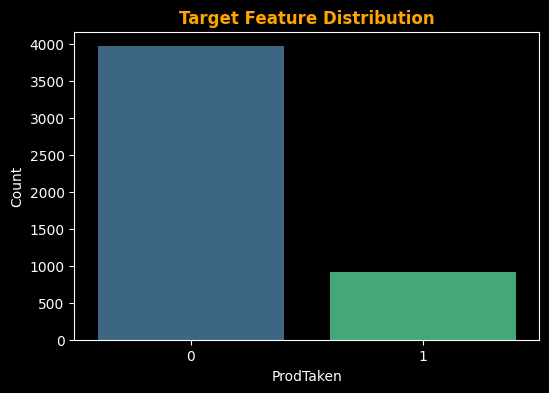

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(x = 'ProdTaken' , data = df , palette = 'viridis')

plt.title("Target Feature Distribution", fontsize = 12 , color = 'orange' , fontweight = 'bold')
plt.xlabel("ProdTaken", color = 'white')
plt.ylabel("Count", color = 'white')

plt.show()

<!-- -- -->

ANALYSING DISTRIBUTION OF ALL THE  CONTINUOUS NUMERICAL COLUMNS USING A HISTOGRAM 

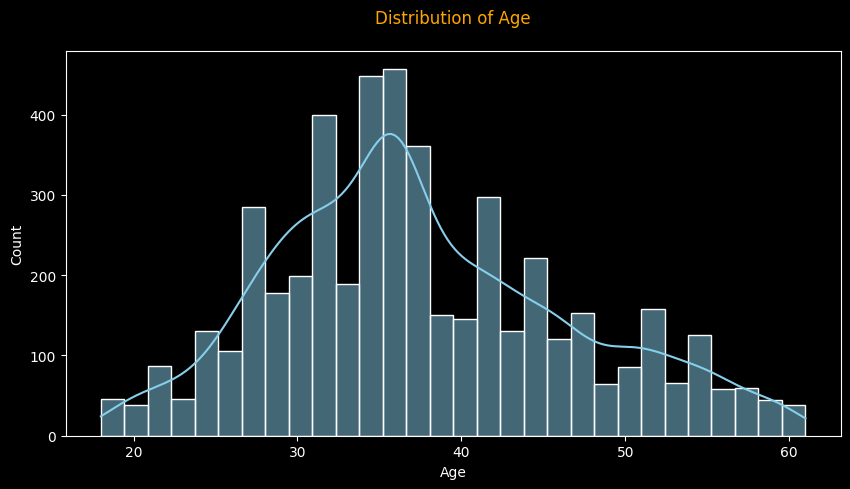

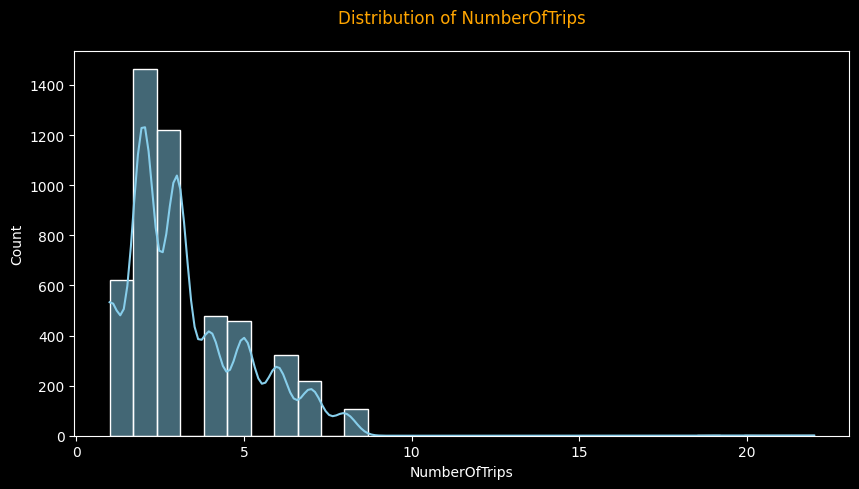

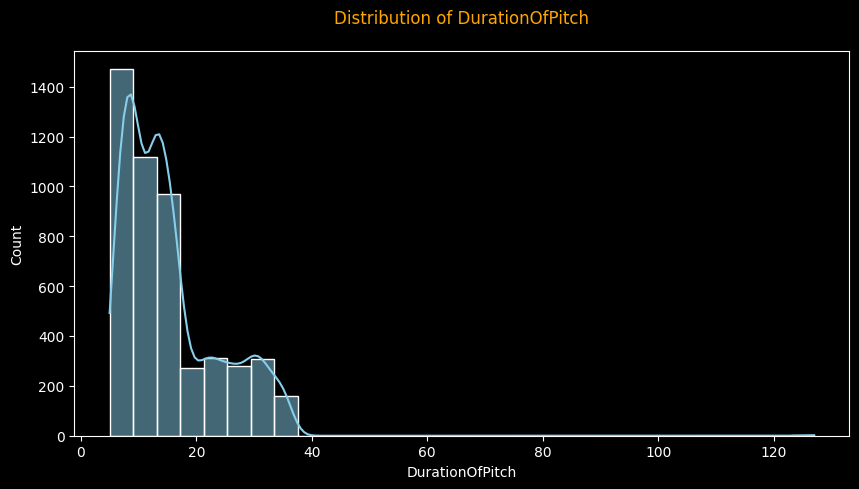

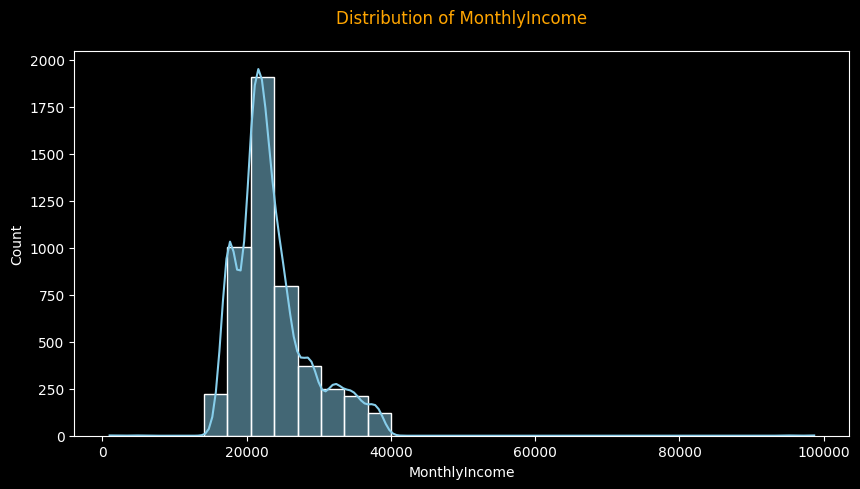

In [ ]:
cont_num_cols = ['Age' , 'NumberOfTrips' , 'DurationOfPitch' , 'MonthlyIncome']

for col in cont_num_cols:
    plt.figure(figsize=(10,5))

    sns.histplot(df[col], bins=30, kde=True, color='skyblue', edgecolor='white')
    plt.title(f'Distribution of {col}', color='orange', y = 1.05)
    
    plt.show()

INFERENCES:

- Age: Roughly Normally Distributed

- NoOfTrips: Right - Skewed, Most People take 1-2 trips

- DurationOfPitch:  Right - Skewed, Most pitches are short

- MonthlyIncome: Right-Skewed, Majority in 20 25k bracket. 

<!-- ------ -->

ANALYSING DISCRETE CATEGORICAL FEATURES

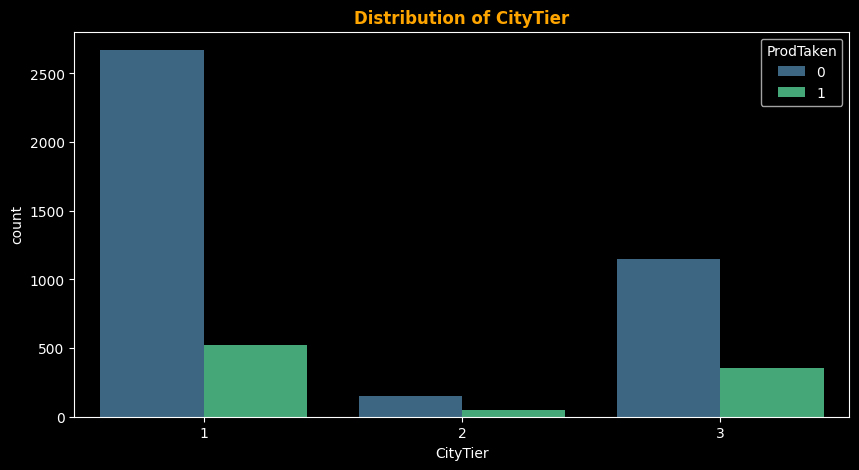

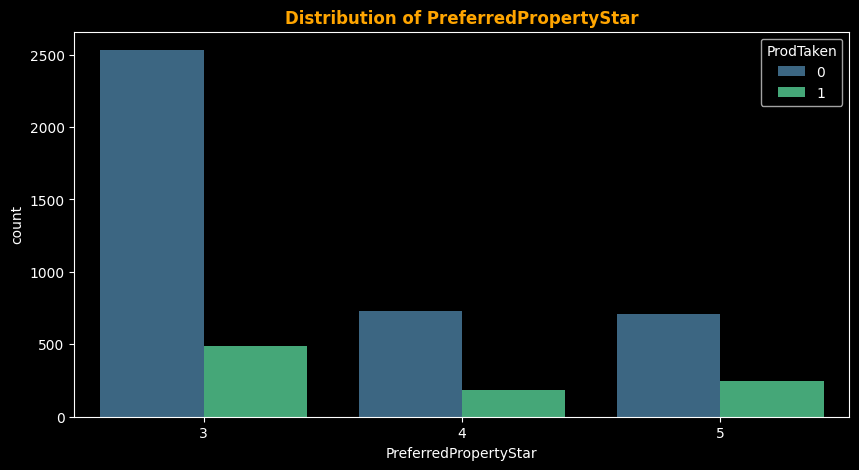

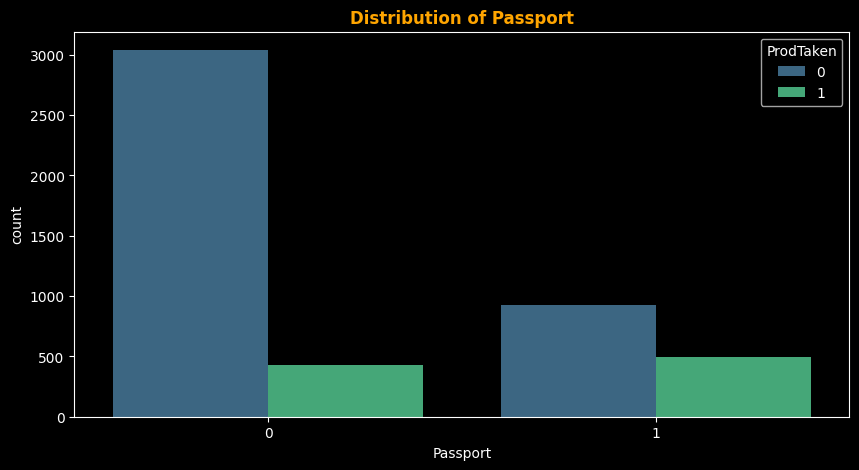

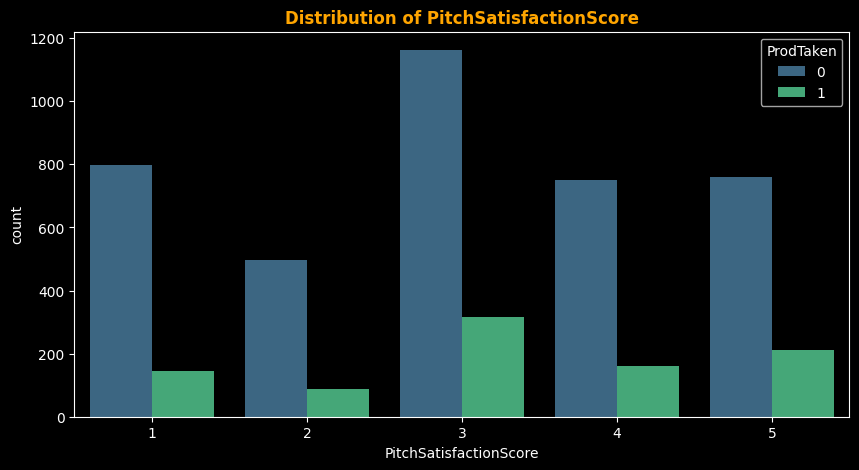

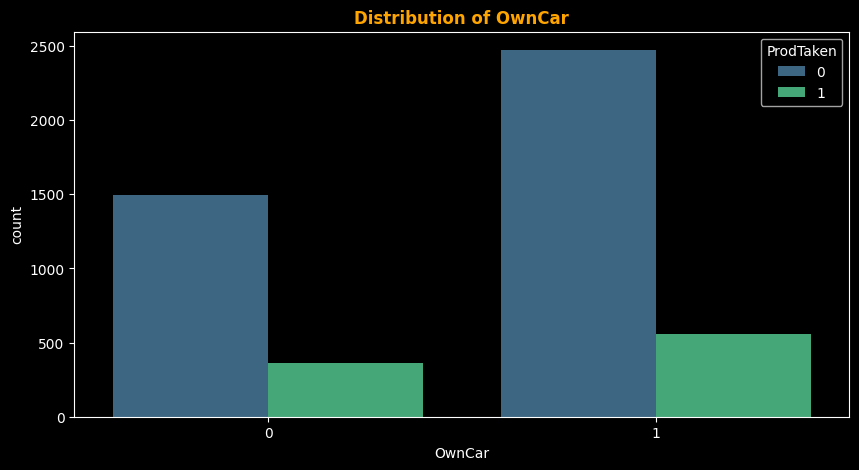

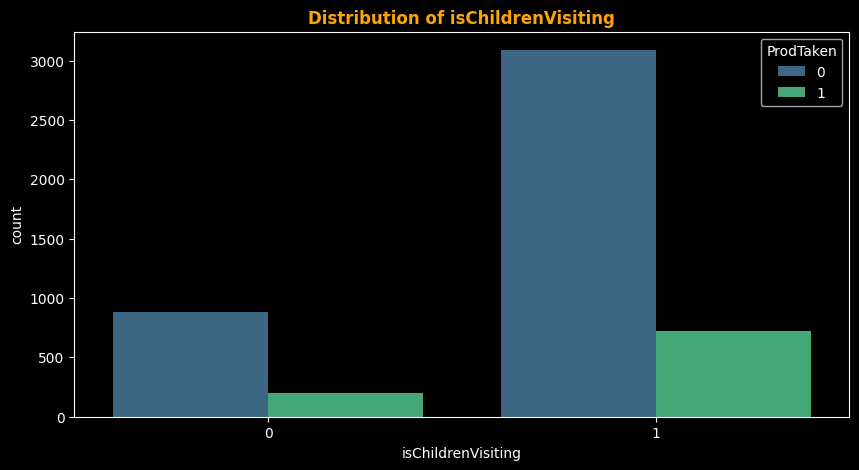

In [55]:
discrete_cat_cols = ['CityTier', 'PreferredPropertyStar', 'Passport' , 'PitchSatisfactionScore' , 'OwnCar' , 'isChildrenVisiting']

for cols in discrete_cat_cols:

    plt.figure(figsize=(10,5))

    sns.countplot(x = cols , data = df , palette = 'viridis' , hue = 'ProdTaken')
    plt.title(f'Distribution of {cols}', fontsize=12, color='orange', fontweight='bold')
    
    plt.show()

In [ ]:
# (ProdTaken / total customers in that category)

for col in discrete_cat_cols :
    print(f"\n Conversion rate by {col}")
    display(pd.crosstab(df[col] , df['ProdTaken'] , normalize = 'index'))


 Conversion rate by CityTier


ProdTaken,0,1
CityTier,,
1,0.836991,0.163009
2,0.767677,0.232323
3,0.764000,0.236000



 Conversion rate by PreferredPropertyStar


ProdTaken,0,1
PreferredPropertyStar,,
3,0.838357,0.161643
4,0.800657,0.199343
5,0.738494,0.261506



 Conversion rate by Passport


ProdTaken,0,1
Passport,,
0,0.877092,0.122908
1,0.652602,0.347398



 Conversion rate by PitchSatisfactionScore


ProdTaken,0,1
PitchSatisfactionScore,,
1,0.847134,0.152866
2,0.849829,0.150171
3,0.786198,0.213802
4,0.822368,0.177632
5,0.783505,0.216495



 Conversion rate by OwnCar


ProdTaken,0,1
OwnCar,,
0,0.806034,0.193966
1,0.815303,0.184697



 Conversion rate by isChildrenVisiting


ProdTaken,0,1
isChildrenVisiting,,
0,0.813309,0.186691
1,0.811350,0.188650


INFERENCES:

CityTier:
* Majority customers belong to CityTier 1

* Customers from Tier 3 cities show relatively higher product uptake despite lower volume, indicating stronger conversion potential.

PreferredPropertyStar:
* Most customers prefer ask for 3 star properties. However, 5-star preference has higher ProdTaken proportion

Passport:
* Passport ownership strongly correlates with product uptake, making it a highly  predictive feature.

PitchSatisfactionScore:
* Higher satisfaction scores (3–5) → higher ProdTaken. Pitch satisfaction shows a clear positive relationship with product uptake, confirming its importance as a behavioral feature.

OwnCar: 
* Car ownership positively influences product acceptance, suggesting higher spending capacity or travel intent.

isChildrenVisiting: 
* Customers traveling with children demonstrate higher product uptake, indicating family-oriented packages may perform better.


<!-- --- -->

<!-- -- -->

ANALYZING CATEGORICAL FEATURES          

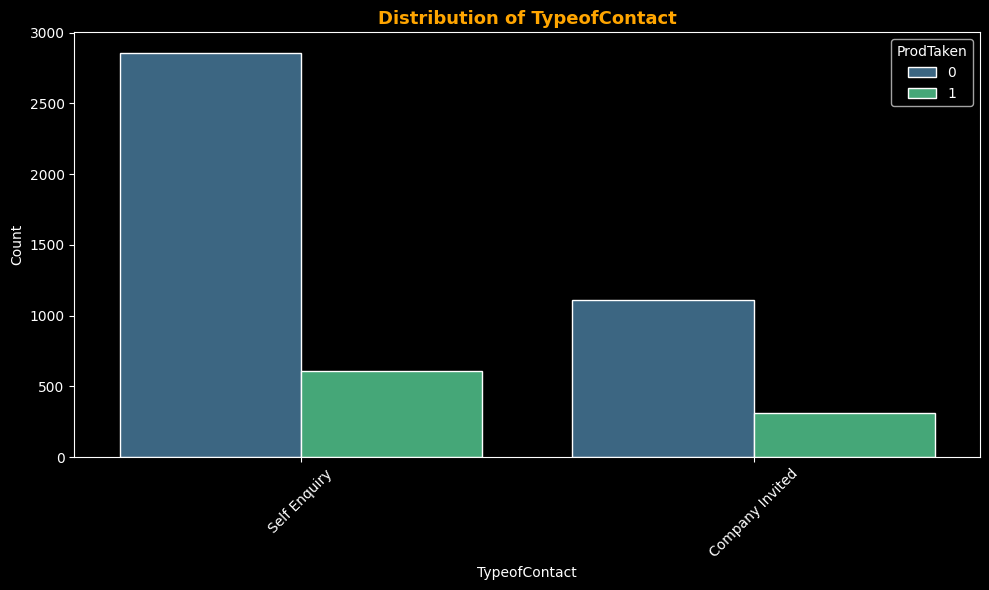

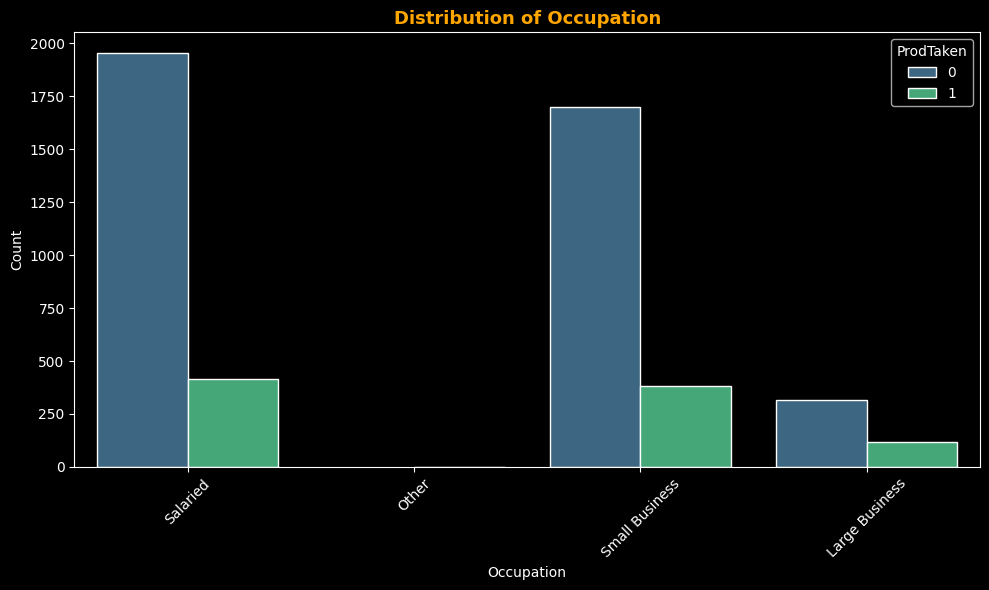

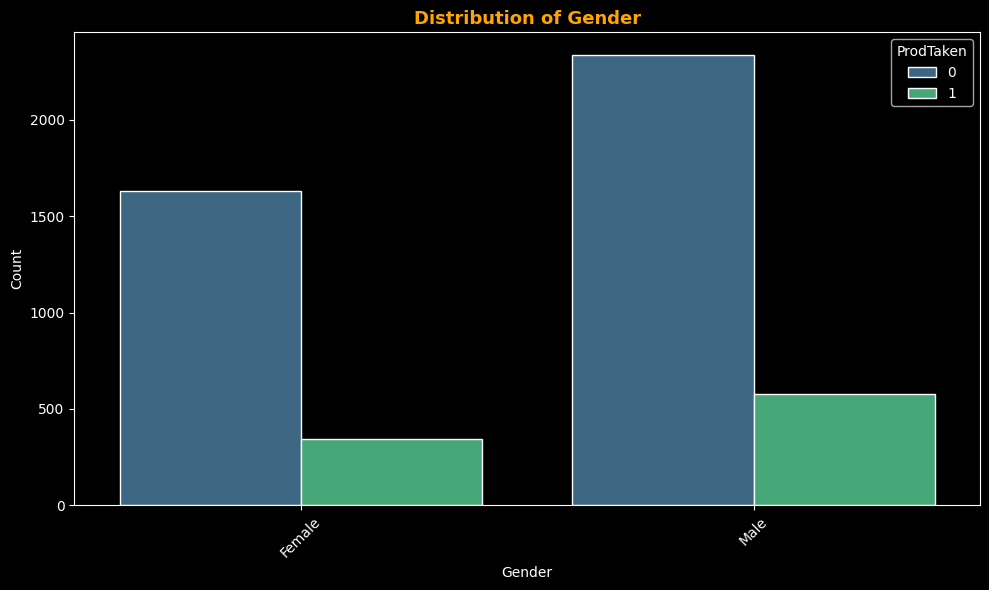

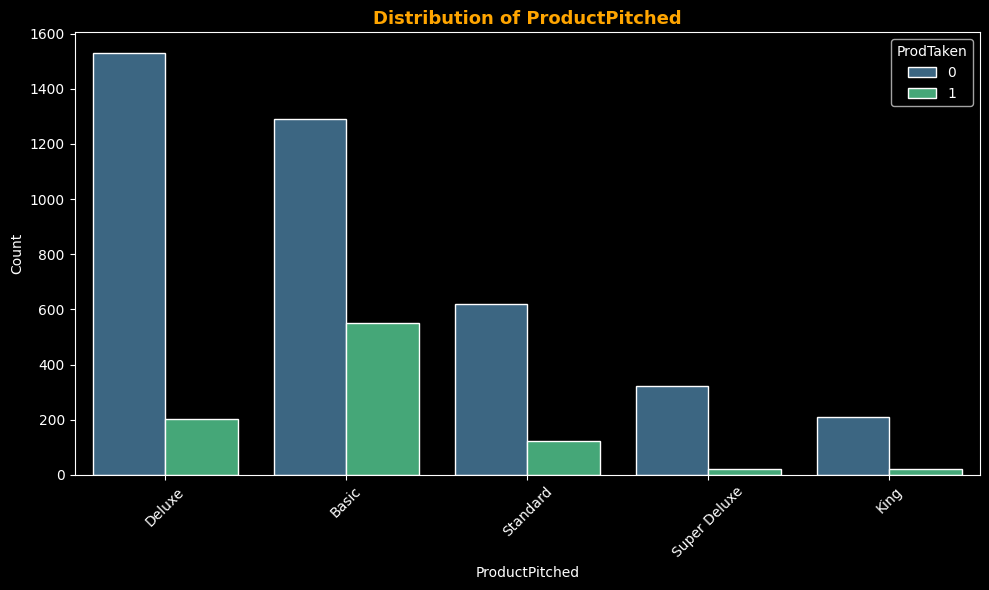

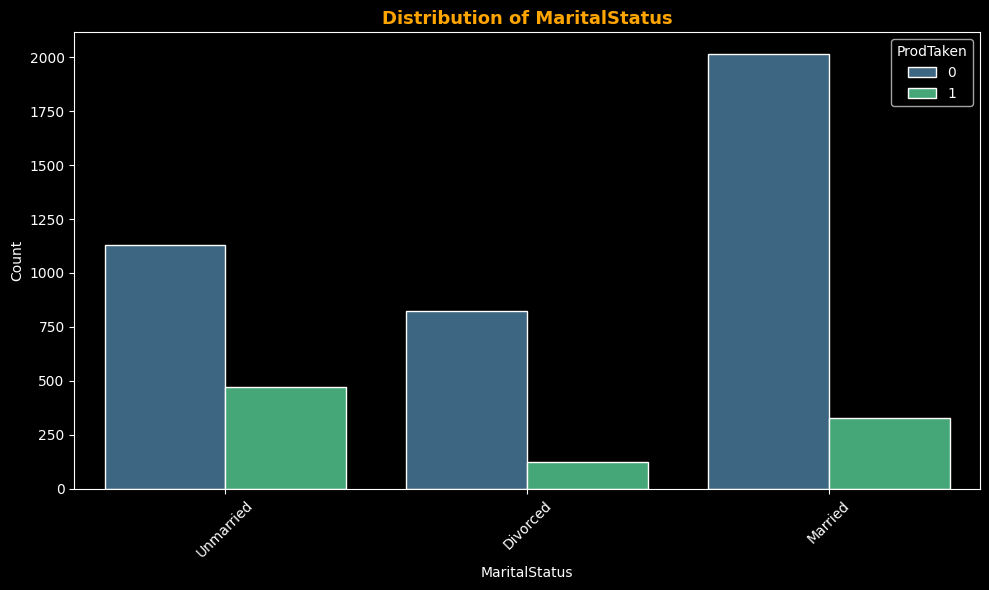

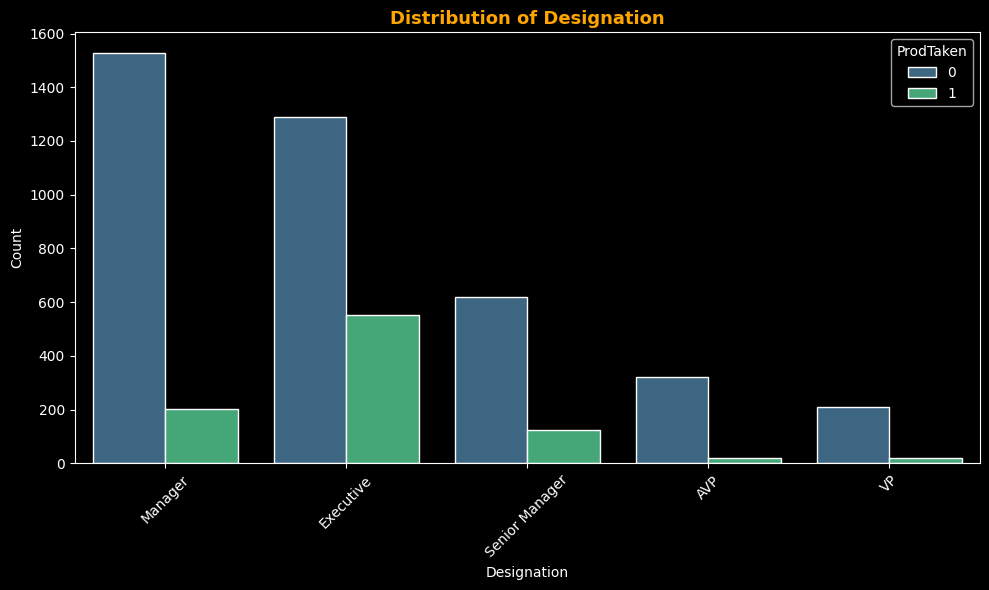

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=col, palette='viridis', edgecolor='white', hue = "ProdTaken")
    plt.title(f'Distribution of {col}', fontsize=13, color='orange', fontweight='bold')
    plt.xlabel(col, color='white')
    plt.ylabel('Count', color='white')
    plt.xticks(color='white', rotation=45)
    plt.yticks(color='white')
    plt.tight_layout()
    plt.show()


In [60]:
for col in cat_cols :
    print(f"\n Conversion rate by {col}")
    display(pd.crosstab(df[col] , df['ProdTaken'] , normalize = 'index'))


 Conversion rate by TypeofContact


ProdTaken,0,1
TypeofContact,,
Company Invited,0.781536,0.218464
Self Enquiry,0.824157,0.175843



 Conversion rate by Occupation


ProdTaken,0,1
Occupation,,
Large Business,0.723502,0.276498
Other,0.000000,1.000000
Salaried,0.825169,0.174831
Small Business,0.815739,0.184261



 Conversion rate by Gender


ProdTaken,0,1
Gender,,
Female,0.826572,0.173428
Male,0.801783,0.198217



 Conversion rate by ProductPitched


ProdTaken,0,1
ProductPitched,,
Basic,0.700326,0.299674
Deluxe,0.882217,0.117783
King,0.913043,0.086957
Standard,0.832884,0.167116
Super Deluxe,0.941520,0.058480



 Conversion rate by MaritalStatus


ProdTaken,0,1
MaritalStatus,,
Divorced,0.869474,0.130526
Married,0.860684,0.139316
Unmarried,0.705882,0.294118



 Conversion rate by Designation


ProdTaken,0,1
Designation,,
AVP,0.941520,0.058480
Executive,0.700326,0.299674
Manager,0.882217,0.117783
Senior Manager,0.832884,0.167116
VP,0.913043,0.086957


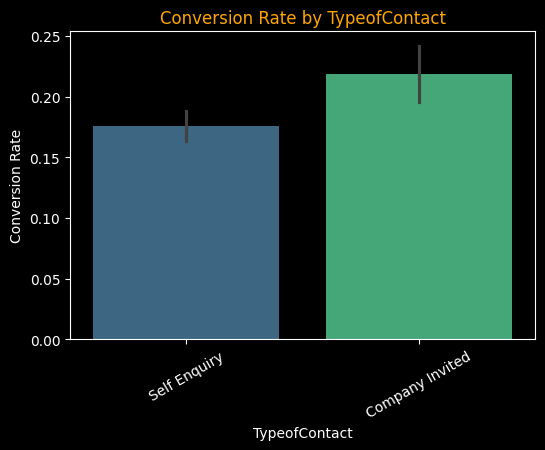

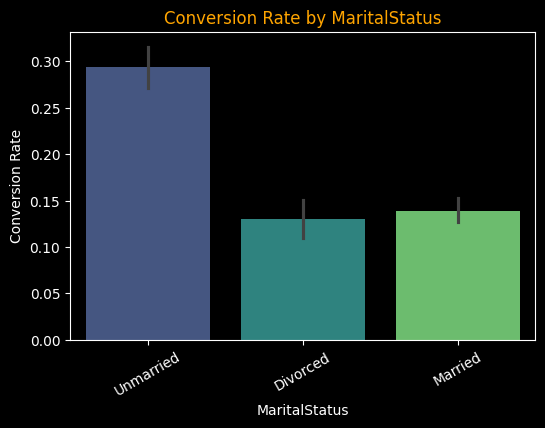

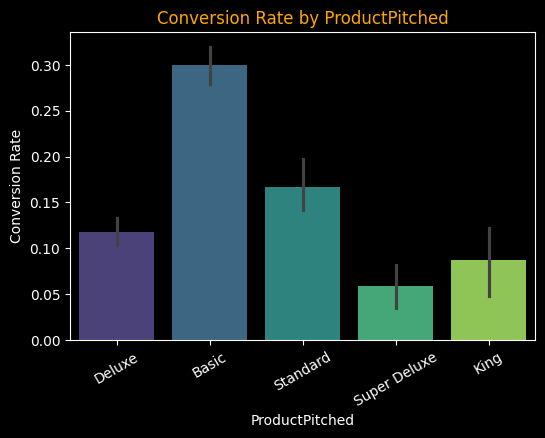

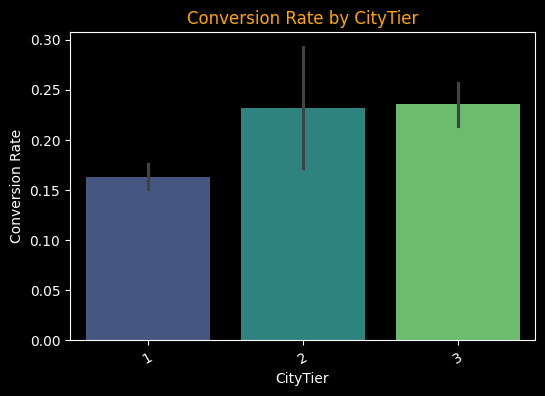

In [61]:
cols = ['TypeofContact' , 'MaritalStatus' , 'ProductPitched' , 'CityTier']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y="ProdTaken", data=df, palette="viridis")
    plt.title(f"Conversion Rate by {col}", fontsize=12, color="orange")
    plt.xticks(rotation=30)
    plt.ylabel("Conversion Rate")
    plt.show()

INFERENCES:

- TypeofContact: Mostly self enquiry, However, company invited have a higher conversion rate. 

- Occupation: Most customers are salaried, Large Businessmen have highest conversion rate. 

- Gender: Males tend to have a higher conversion rate than Feamles. 

- ProdPitched: Deluxe & Basic are pitched the most (high volume). Basic has the highest number of purchases (ProdTaken = 1). Super Deluxe & King have very low uptake. Even though Deluxe and King are pitched a lot, its conversion is lower. (Premium products suffer from low acceptance)

- Married: Unmarried prefer to buy the most. 

- Designation: Executives show the highest number of purchases. Mid-level roles (Executives) are more likely to take the product.  Managers are high in volume but have lower conversion. Senior Manager, AVP, VP show very low uptake. Very senior roles have low interest / low conversion. Junior–mid segment is the best target group

<!-- ---- -->

TOP CONVERTING PERSONAS

In [92]:
top_personas = df.groupby(['CityTier','Age','MaritalStatus','Occupation'])['ProdTaken'].agg(['count','mean']).query('count >= 30').sort_values(by='mean', ascending=False)
top_personas

count      mean
CityTier Age MaritalStatus Occupation                     
1        33  Unmarried     Salaried           34  0.352941
         36  Unmarried     Salaried           65  0.215385
3        36  Married       Small Business     30  0.200000
1        36  Married       Small Business     48  0.166667
         38  Married       Small Business     31  0.161290
         36  Unmarried     Small Business     45  0.155556
         35  Married       Salaried           45  0.133333
         41  Married       Salaried           31  0.129032
         42  Married       Salaried           31  0.129032
         36  Married       Salaried           93  0.118280
             Divorced      Salaried           32  0.093750
         34  Married       Salaried           33  0.090909
         30  Married       Salaried           34  0.088235
         31  Married       Salaried           30  0.066667
         37  Married       Salaried           40  0.050000
         43  Married       Salaried           32  0.031250
         38  Married       Salaried           33  0.030303

In [96]:
df.groupby('ProdTaken')['Age'].mean()

ProdTaken
0    38.177419
1    34.829348
Name: Age, dtype: float64

INFERENCE: CityTier × Age × MaritalStatus × Occupation

* CityTier 1 | Age 33 | Unmarried | Salaried
* Conversion = 35% 

Young, unmarried salaried professionals in Tier-1 cities are the best-performing segment.

Conversion is highest among young (33–36), unmarried salaried professionals, while married salaried customers above mid-30s exhibit significantly lower product uptake despite higher volume.

Average age of customers who buy the profducts is ~ 34-35

 <!-- --- -->

<!-- ------ -->

ANALYSING CORRELATION BETWEEN NUMERIC FEATURES

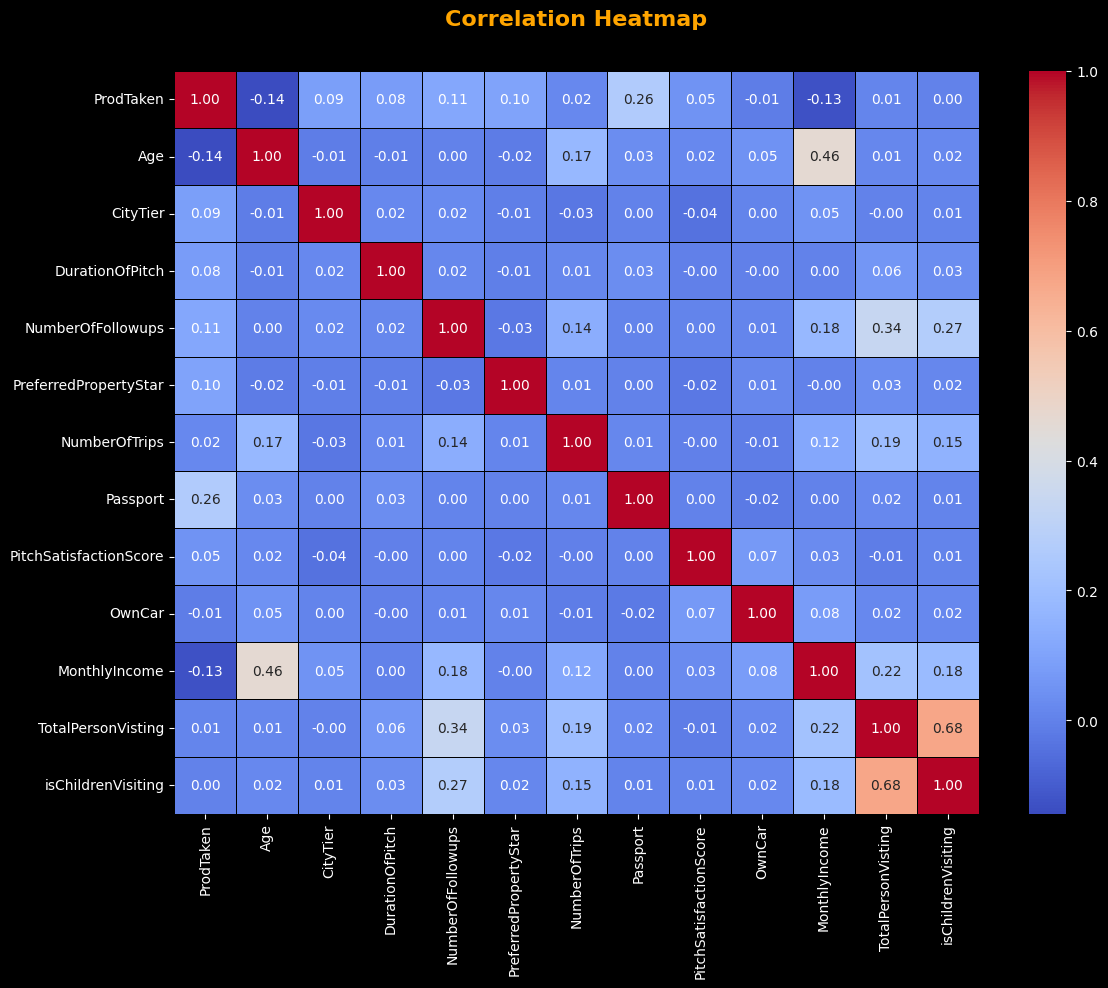

In [93]:
corr = df[num_cols].corr()    

plt.figure(figsize=(12, 10))

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm' , linecolor = 'black' , linewidths = 0.5)

plt.title('Correlation Heatmap', fontsize=16, color='orange', fontweight='bold' , y = 1.05)
plt.tight_layout()
plt.show()

No single numeric feature strongly explains conversion, multiple moderate signals together drive purchase behavior.

<!-- --- -->

<!-- ---- -->

<!-- ----- -->

<!-- ---- -->

## Model Training

In [110]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score , roc_curve , roc_auc_score , auc , average_precision_score , precision_recall_curve, classification_report

from sklearn.model_selection import RandomizedSearchCV

In [100]:
X = df.drop(['ProdTaken'] , axis = 1)
y = df['ProdTaken']

In [101]:
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalPersonVisting,isChildrenVisiting
0,41,Self Enquiry,3,6,Salaried,Female,3,Deluxe,3,Unmarried,1,1,2,1,Manager,20993,3,0
1,49,Company Invited,1,14,Salaried,Male,4,Deluxe,4,Divorced,2,0,3,1,Manager,20130,5,1
2,37,Self Enquiry,1,8,Other,Male,4,Basic,3,Unmarried,7,1,3,0,Executive,17090,3,0
3,33,Company Invited,1,9,Salaried,Female,3,Basic,3,Divorced,2,1,5,1,Executive,17909,3,1
4,36,Self Enquiry,1,8,Small Business,Male,3,Basic,4,Divorced,1,0,5,1,Executive,18468,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49,Self Enquiry,3,9,Small Business,Male,5,Deluxe,4,Unmarried,2,1,1,1,Manager,26576,4,1
4884,28,Company Invited,1,31,Salaried,Male,5,Basic,3,Unmarried,3,1,3,1,Executive,21212,6,1
4885,52,Self Enquiry,3,17,Salaried,Female,4,Standard,4,Married,7,0,1,1,Senior Manager,31820,7,1
4886,19,Self Enquiry,3,16,Small Business,Male,4,Basic,3,Unmarried,3,0,5,0,Executive,20289,5,1


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((3910, 18), (978, 18), (3910,), (978,))

<!-- -- -->

SELECTING NUMERIC AND CATEGORICAL FEATURES

In [105]:
num_cols = X_train.select_dtypes(exclude = 'object').columns.tolist()

cat_cols = X_train.select_dtypes(include = 'object').columns.tolist()

<!-- -- -->

TRAINING MODELS

In [112]:
# Define numerical and categorical columns
num_cols = X_train.select_dtypes(exclude = 'object').columns.tolist()

cat_cols = X_train.select_dtypes(include = 'object').columns.tolist()



preprocessor = ColumnTransformer(
    transformers = [
        ('OneHotEncoder', OneHotEncoder(drop = 'first',handle_unknown = 'ignore'), cat_cols)
    ], remainder='passthrough'
)

preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('OneHotEncoder', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g

<!-- ----- -->

In [113]:
scale_pos = y_train.value_counts()[0] / y_train.value_counts()[1]

print(scale_pos)

4.363511659807956


In [115]:
models = {
    
    'Decision Tree': DecisionTreeClassifier(random_state = 42 , class_weight = 'balanced'),
    'Random Forest': RandomForestClassifier(random_state = 42 , class_weight = 'balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state = 42), 
    'AdaBoostClassifier': AdaBoostClassifier(random_state = 42),
    'XGBClassifier' : XGBClassifier(random_state = 42 ,  scale_pos_weight = scale_pos)

}

In [116]:
results = []

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    pipe.fit(X_train, y_train)

    y_pred_train = pipe.predict(X_train)

    y_pred = pipe.predict(X_test)

    print(f'Model : {name} trained successfully.' , '\n')
    # Train Metrics
    print("Performance on train set : \n")

    train_acc = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)

    print(f"Accuracy: {train_acc}")
    print(f"F1 Score: {train_f1}")
    print(f"Precision: {train_precision}")
    print(f"Recall: {train_recall}\n")

    print("\n\n")

    # Test Metrics
    print("Performance on test set : \n")

    test_acc = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)


    
    print(f"Accuracy: {test_acc}")
    print(f"F1 Score: {test_f1}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}\n")
    print("\n" , "Classification Report : \n" , classification_report(y_test, y_pred))
    print("\n")
    print("--------"*50)
    print("\n")

    results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Train F1': train_f1,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Test Accuracy': test_acc,
        'Test F1': test_f1,
        'Test Precision': test_precision,
        'Test Recall': test_recall
    })


Model : Decision Tree trained successfully. 

Performance on train set : 

Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0




Performance on test set : 

Accuracy: 0.9151329243353783
F1 Score: 0.7621776504297995
Precision: 0.8417721518987342
Recall: 0.6963350785340314


 Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       787
           1       0.84      0.70      0.76       191

    accuracy                           0.92       978
   macro avg       0.89      0.83      0.86       978
weighted avg       0.91      0.92      0.91       978



-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [117]:
results_df = pd.DataFrame(results)
results_df

,Model,Train Accuracy,Train F1,Train Precision,Train Recall,Test Accuracy,Test F1,Test Precision,Test Recall
0,Decision Tree,1.000000,1.000000,1.000000,1.000000,0.915133,0.762178,0.841772,0.696335
1,Random Forest,1.000000,1.000000,1.000000,1.000000,0.914110,0.725490,0.965217,0.581152
2,Gradient Boosting,0.893095,0.638408,0.864169,0.506173,0.862986,0.534722,0.793814,0.403141
3,AdaBoostClassifier,0.847570,0.383023,0.780591,0.253772,0.834356,0.357143,0.737705,0.235602
4,XGBClassifier,0.999488,0.998630,0.997264,1.000000,0.941718,0.843836,0.885057,0.806283


<!-- - -->

SELECTING THE BEST MODEL

In [119]:
xgb = XGBClassifier(reg_alpha = 0.1, reg_lambda = 5, random_state = 42 , use_label_encoder = False , eval_metric = 'logloss' , scale_pos_weight = scale_pos)

xgb_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', xgb)
])

xgb_pipe.fit(X_train, y_train)

y_pred_best = xgb_pipe.predict(X_test)

print("Performance on test set : \n")

test_acc = accuracy_score(y_test, y_pred_best)
test_f1 = f1_score(y_test, y_pred_best)
test_precision = precision_score(y_test, y_pred_best)
test_recall = recall_score(y_test, y_pred_best)

print(f"Accuracy: {test_acc:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}\n")
print("\n" , "Classification Report : \n" , classification_report(y_test, y_pred_best))
print("\n")
print("--------"*50)
print("\n")

Performance on test set : 

Accuracy: 0.95
F1 Score: 0.87
Precision: 0.91
Recall: 0.84


 Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       787
           1       0.91      0.84      0.87       191

    accuracy                           0.95       978
   macro avg       0.94      0.91      0.92       978
weighted avg       0.95      0.95      0.95       978



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




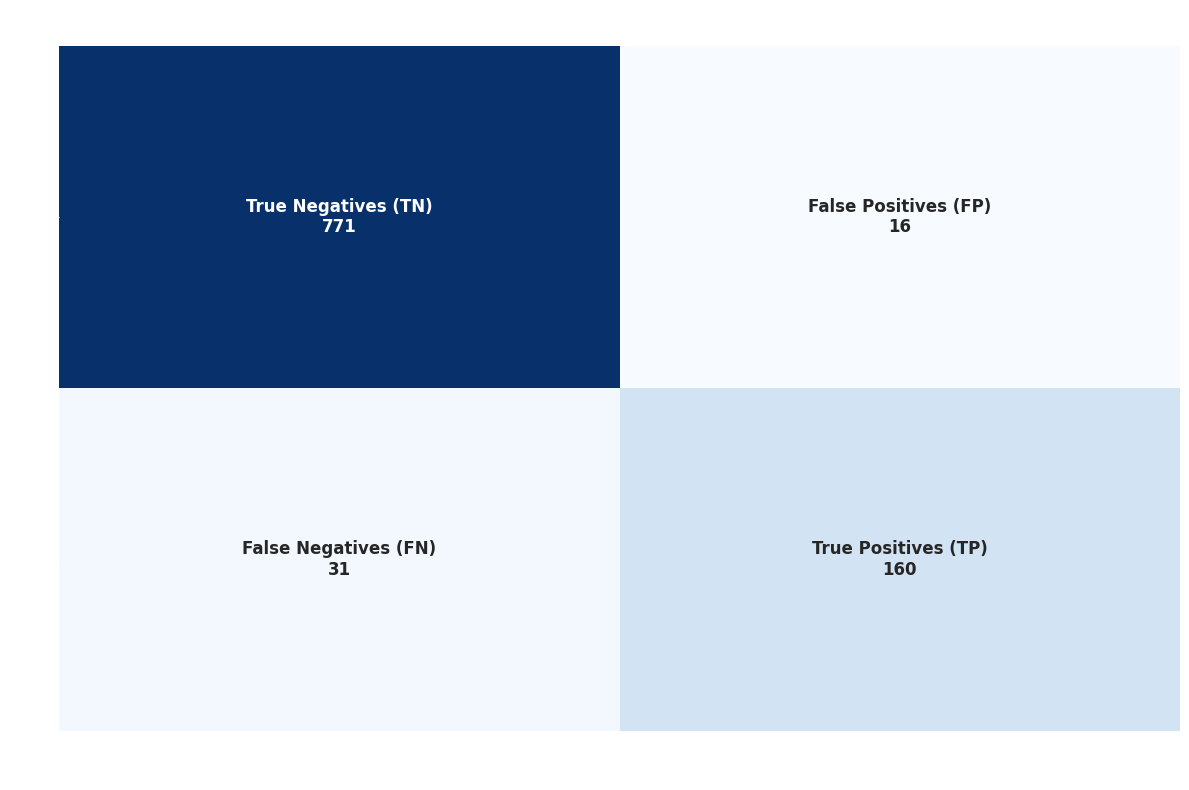

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Create labels for each cell (TP, FP, FN, TN)
group_names = ['True Negatives (TN)', 'False Positives (FP)',
               'False Negatives (FN)', 'True Positives (TP)']

# Flatten confusion matrix and pair with names
group_counts = [f"{value}" for value in cm.flatten()]
labels = [f"{name}\n{count}" for name, count in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

# Plot heatmap
plt.figure(figsize=(12, 8), facecolor='white')
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            annot_kws={"size": 12, "weight": "bold"})

# Add titles and axis labels
plt.xlabel('Predicted Label', fontsize = 15)
plt.ylabel('True Label', fontsize = 15)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


In [121]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_best))

[[771  16]
 [ 31 160]]


In [122]:
# Check true conversion rate in the test set

actual_conversion_test = (y_test.sum() / len(y_test)) * 100
print(f"Actual Conversion Rate (Test Set): {actual_conversion_test:.2f}%")


Actual Conversion Rate (Test Set): 19.53%


In [123]:
import numpy as np

# confusion matrix
cm = np.array([[771, 16],
               [31, 160]])

predicted_conversion_rate = (cm[0,1] + cm[1,1]) / cm.sum() * 100
print(f"Predicted Conversion Rate (Test Set): {predicted_conversion_rate:.2f}%")


Predicted Conversion Rate (Test Set): 18.00%


<!-- ------ -->

ROC AUC CURVE

ROC-AUC Score: 0.9561393588216901


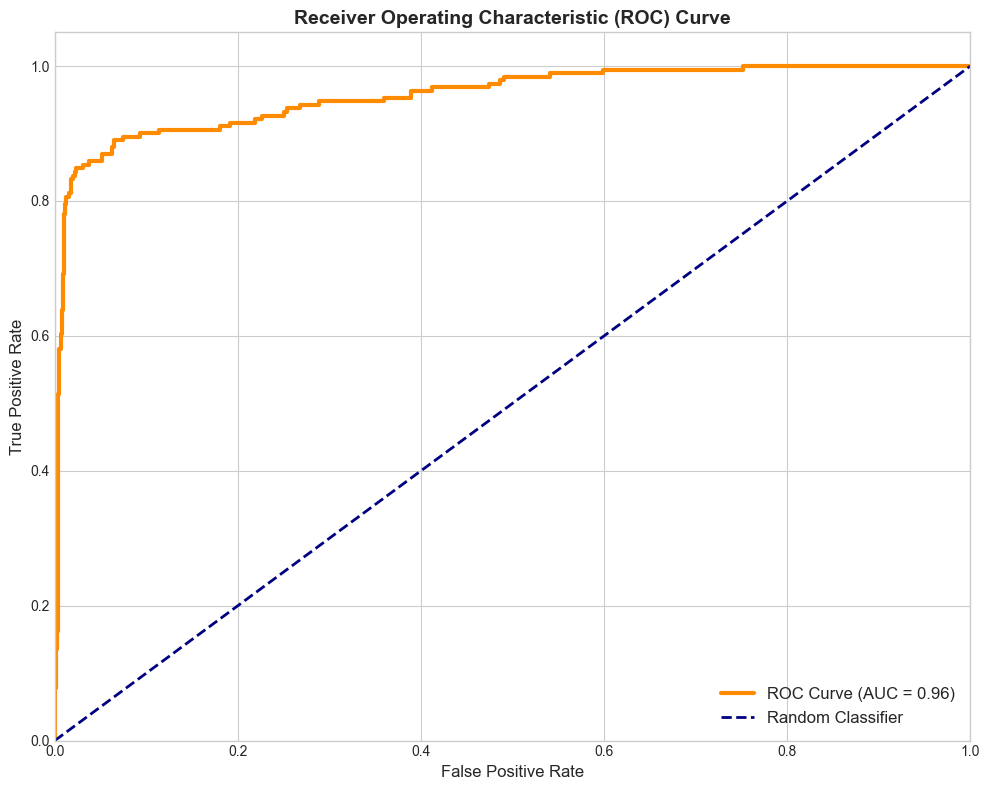


Detailed Metrics:
ROC-AUC Score: 0.9561
Area under ROC curve: 95.6%


In [124]:
plt.style.use('seaborn-v0_8-whitegrid')
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predicted probabilities for the positive class
y_pred_prob = xgb_pipe.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", auc_score)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# Print additional metrics
print(f"\nDetailed Metrics:")
print(f"ROC-AUC Score: {auc_score:.4f}")
print(f"Area under ROC curve: {auc_score:.1%}")

<!-- ---- -->

PRECISION - RECALL CURVE

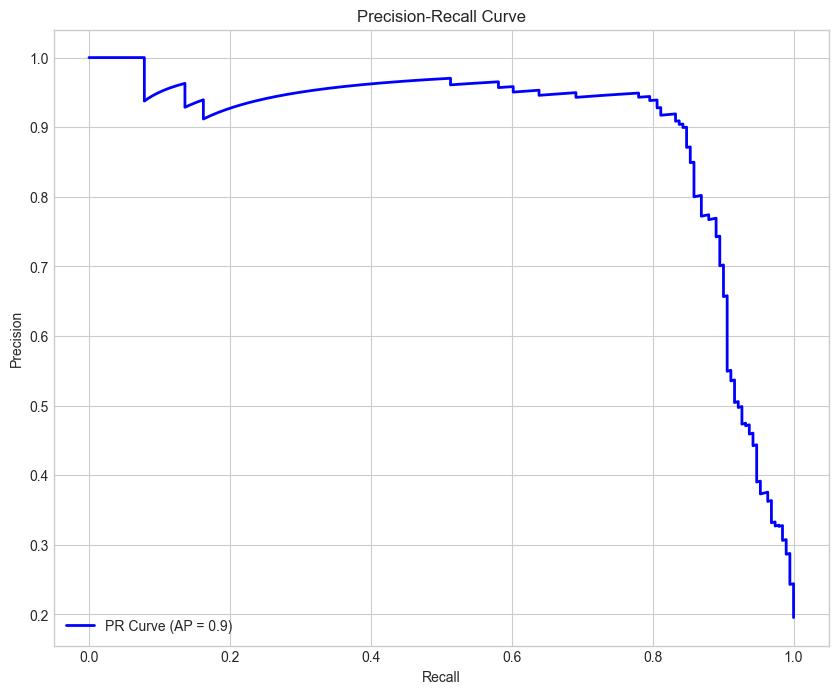

In [125]:
# 2️⃣ Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# 3️⃣ Compute the average precision score (area under PR curve)
avg_precision = average_precision_score(y_test, y_pred_prob)

# 4️⃣ Plot the Precision-Recall curve
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AP = {avg_precision:.1f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()